In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
constructor_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/constructors.csv')


In [ ]:
# Load race data
constructor_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/constructors.csv')
driver_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drivers.csv')
results_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/results.csv')
race_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/races.csv')

In [ ]:
race_data.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
constructor_data.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [ ]:
driver_data.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
results_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
# Merge driver data with results data based on driver ID
results_driver_merged = pd.merge(results_data, driver_data, how='left', left_on='driverId', right_on='driverId')

# Merge constructor data with merged driver-results data based on constructor ID
results_constructor_driver_merged = pd.merge(results_driver_merged, constructor_data, how='left', left_on='constructorId', right_on='constructorId')

# Merge race data based on race ID
df = pd.merge(results_constructor_driver_merged, race_data, how='left', left_on='raceId', right_on='raceId')

# Now you have the results data merged with driver data and constructor data based on driver ID and constructor ID
df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,18,2,2,3,5,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,18,3,3,7,7,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,18,4,4,5,11,4,4,4,5.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26080 entries, 0 to 26079
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number_x         26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time_x           26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [ ]:
df.name_x

0             McLaren
1          BMW Sauber
2            Williams
3             Renault
4             McLaren
             ...     
26075      AlphaTauri
26076        Williams
26077    Haas F1 Team
26078         Ferrari
26079         McLaren
Name: name_x, Length: 26080, dtype: object

In [ ]:
# Filter the race data to include only the last 30 years
df30 = df[df['year']>=2010]

df30.to_csv('df.csv', index=False)


<ipython-input-92-150cf93de4b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df30['points'] = pd.to_numeric(df30['points'], errors='coerce')


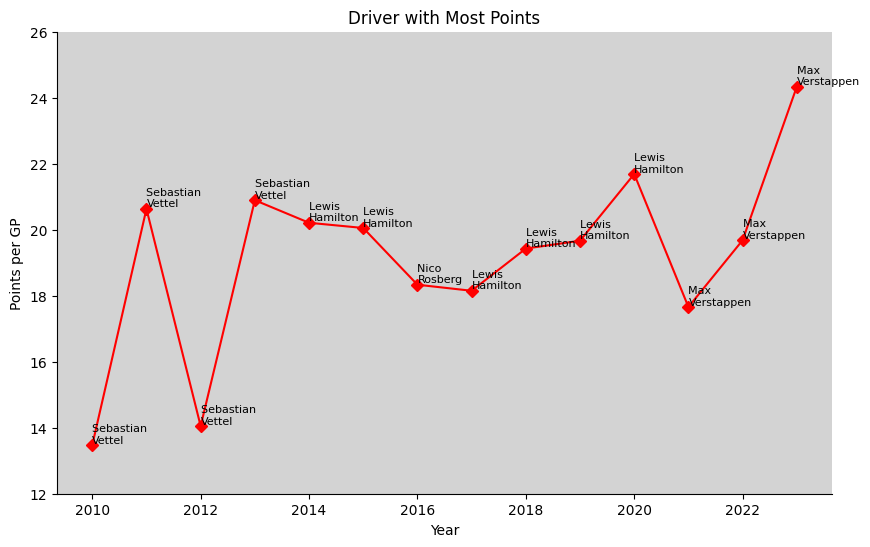

In [ ]:

# First, make sure 'points' column is in numeric format
df30['points'] = pd.to_numeric(df30['points'], errors='coerce')

# Group by 'year', 'raceId', 'forename', and 'surname' to find the total points earned by each driver in each race
total_points_per_race = df30.groupby(['year', 'raceId', 'forename', 'surname'])['points'].sum().reset_index()

# Group by 'year', 'forename', and 'surname' to find the average points earned by each driver per year
average_points_per_year = total_points_per_race.groupby(['year', 'forename', 'surname'])['points'].mean().reset_index()

# Find the driver with the highest average points in each year
driver_with_highest_avg_points = average_points_per_year.loc[average_points_per_year.groupby('year')['points'].idxmax()]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(driver_with_highest_avg_points['year'], driver_with_highest_avg_points['points'], marker='D', linestyle='-', color='#FF0000')
plt.title('Driver with Most Points')
plt.xlabel('Year')
plt.ylabel('Points per GP')

# Label the data points with the corresponding driver names
for i, row in driver_with_highest_avg_points.iterrows():
    plt.text(row['year'], row['points'], f"{row['forename']} \n{row['surname']}", ha='left', va='bottom', fontsize=8, color='black')

plt.ylim(12,26)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#D3D3D3')

plt.show()

In [ ]:
# Group by 'year', 'forename', and 'surname', and calculate the number of wins and total races for each person in each year
grouped_wins = df30.groupby(['year', 'forename', 'surname']).agg({'positionOrder': lambda x: (x == 1).sum(), 'raceId': 'nunique'}).reset_index()

# Calculate the average win for each person in each year
grouped_wins['average_win'] = grouped_wins['positionOrder'] / grouped_wins['raceId']

# Display the resulting DataFrame
print(grouped_wins)

     year   forename  surname  positionOrder  raceId  average_win
0    2010     Adrian    Sutil              0      19     0.000000
1    2010      Bruno    Senna              0      18     0.000000
2    2010  Christian    Klien              0       3     0.000000
3    2010     Felipe    Massa              0      19     0.000000
4    2010   Fernando   Alonso              5      19     0.263158
..    ...        ...      ...            ...     ...          ...
320  2023      Oscar  Piastri              0      12     0.000000
321  2023     Pierre    Gasly              0      12     0.000000
322  2023     Sergio    Pérez              2      12     0.166667
323  2023   Valtteri   Bottas              0      12     0.000000
324  2023       Yuki  Tsunoda              0      12     0.000000

[325 rows x 6 columns]


In [ ]:
# Find the row indices corresponding to the highest average_win for each year
idx_max_average_win = grouped_wins.groupby('year')['average_win'].idxmax()

# Select the rows with the highest average_win for each year
drivers_with_highest_average_win = grouped_wins.loc[idx_max_average_win]

# Display the resulting DataFrame
print(drivers_with_highest_average_win)

     year   forename     surname  positionOrder  raceId  average_win
4    2010   Fernando      Alonso              5      19     0.263158
49   2011  Sebastian      Vettel             11      19     0.578947
76   2012  Sebastian      Vettel              5      20     0.250000
100  2013  Sebastian      Vettel             13      19     0.684211
116  2014      Lewis    Hamilton             11      19     0.578947
137  2015      Lewis    Hamilton             10      19     0.526316
161  2016      Lewis    Hamilton             10      21     0.476190
186  2017      Lewis    Hamilton              9      20     0.450000
207  2018      Lewis    Hamilton             11      21     0.523810
229  2019      Lewis    Hamilton             11      21     0.523810
251  2020      Lewis    Hamilton             11      16     0.687500
272  2021        Max  Verstappen             10      22     0.454545
294  2022        Max  Verstappen             15      22     0.681818
317  2023        Max  Verstappen  

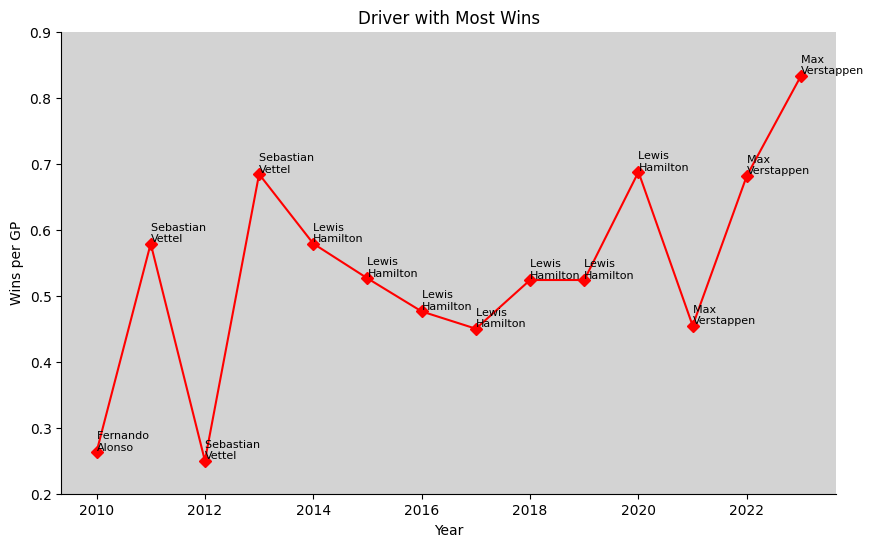

In [ ]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(drivers_with_highest_average_win['year'], drivers_with_highest_average_win['average_win'], marker='D', linestyle='-', color='#FF0000')
plt.title('Driver with Most Wins')
plt.xlabel('Year')
plt.ylabel('Wins per GP')

# Label the data points with the corresponding driver names
for i, row in drivers_with_highest_average_win.iterrows():
    plt.text(row['year'], row['average_win'], f"{row['forename']} \n{row['surname']}", ha='left', va='bottom', fontsize=8, color='black')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#D3D3D3')

plt.ylim(0.2,0.9)
plt.show()

In [ ]:
# Group by 'year', 'forename', and 'surname', and calculate the number of fastest laps and total races for each person in each year
grouped_fl = df30.groupby(['year', 'forename', 'surname']).agg({'rank': lambda x: (x == 1).sum(), 'raceId': 'nunique'}).reset_index()

# Calculate the average win for each person in each year
grouped_fl['average_fl'] = grouped_fl['rank'] / grouped_fl['raceId']

# Display the resulting DataFrame
print(grouped_fl)

     year   forename  surname  rank  raceId  average_fl
0    2010     Adrian    Sutil     0      19    0.000000
1    2010      Bruno    Senna     0      18    0.000000
2    2010  Christian    Klien     0       3    0.000000
3    2010     Felipe    Massa     0      19    0.000000
4    2010   Fernando   Alonso     5      19    0.263158
..    ...        ...      ...   ...     ...         ...
320  2023      Oscar  Piastri     0      12    0.000000
321  2023     Pierre    Gasly     0      12    0.000000
322  2023     Sergio    Pérez     2      12    0.166667
323  2023   Valtteri   Bottas     0      12    0.000000
324  2023       Yuki  Tsunoda     0      12    0.000000

[325 rows x 6 columns]


In [ ]:
# Find the row indices corresponding to the highest average_fl for each year
idx_max_average_fl = grouped_fl.groupby('year')['average_fl'].idxmax()

# Select the rows with the highest average_win for each year
drivers_with_highest_average_fl = grouped_fl.loc[idx_max_average_fl]

# Display the resulting DataFrame
print(drivers_with_highest_average_fl)

     year   forename     surname  rank  raceId  average_fl
4    2010   Fernando      Alonso     5      19    0.263158
40   2011       Mark      Webber     7      19    0.368421
76   2012  Sebastian      Vettel     6      20    0.300000
100  2013  Sebastian      Vettel     7      19    0.368421
116  2014      Lewis    Hamilton     7      19    0.368421
137  2015      Lewis    Hamilton     8      19    0.421053
165  2016       Nico     Rosberg     6      21    0.285714
186  2017      Lewis    Hamilton     7      20    0.350000
217  2018   Valtteri      Bottas     7      21    0.333333
229  2019      Lewis    Hamilton     6      21    0.285714
251  2020      Lewis    Hamilton     6      16    0.375000
271  2021      Lewis    Hamilton     6      22    0.272727
294  2022        Max  Verstappen     5      22    0.227273
317  2023        Max  Verstappen     6      12    0.500000


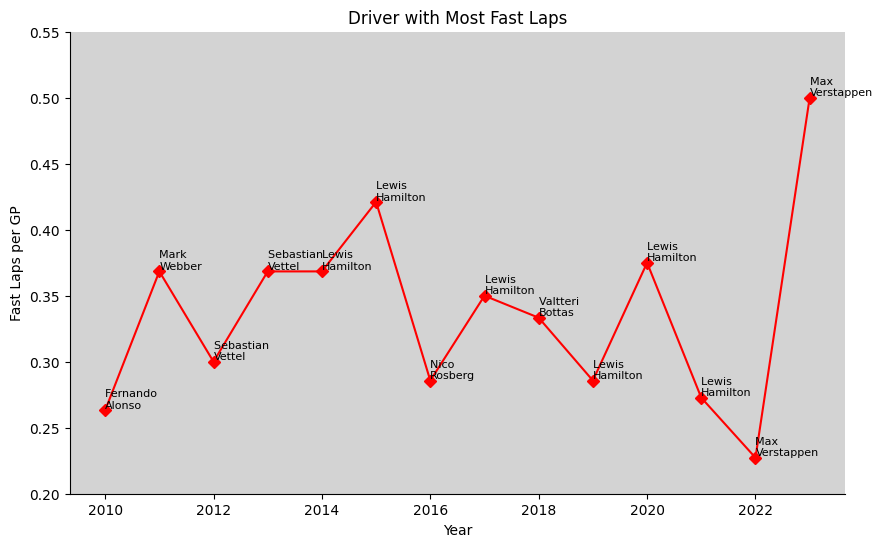

In [ ]:
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(drivers_with_highest_average_fl['year'], drivers_with_highest_average_fl['average_fl'], marker='D', linestyle='-', color='#FF0000')
plt.title('Driver with Most Fast Laps')
plt.xlabel('Year')
plt.ylabel('Fast Laps per GP')

# Label the data points with the corresponding driver names
for i, row in drivers_with_highest_average_fl.iterrows():
    plt.text(row['year'], row['average_fl'], f"{row['forename']} \n{row['surname']}", ha='left', va='bottom', fontsize=8, color='black')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#D3D3D3')

plt.ylim(0.2,0.55)
plt.show()

<ipython-input-96-bc6f2d52173a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df30['points'] = pd.to_numeric(df30['points'], errors='coerce')


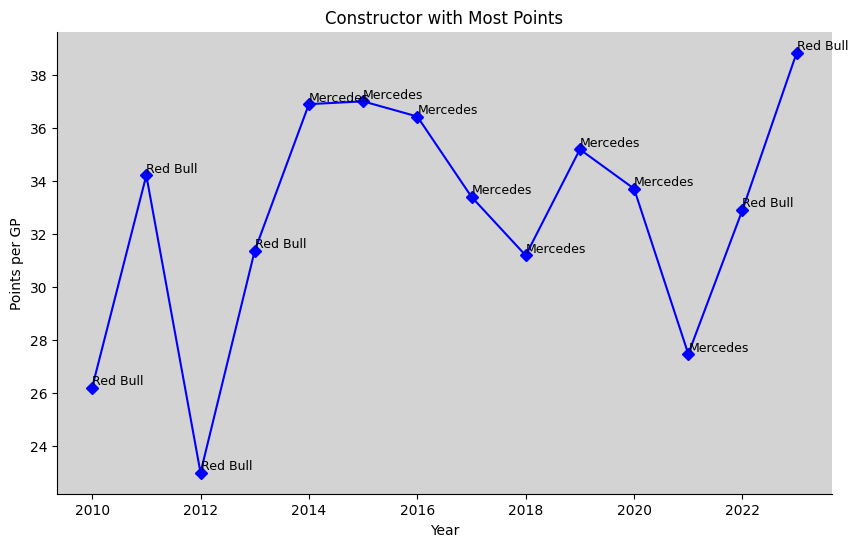

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df30 is your DataFrame
# First, make sure 'points' column is in numeric format
df30['points'] = pd.to_numeric(df30['points'], errors='coerce')

# Group by 'year', 'raceId', 'name_x' to find the total points earned by each constructor in each race
total_points_per_race = df30.groupby(['year', 'raceId', 'name_x'])['points'].sum().reset_index()

# Group by 'year', 'name_x' to find the average points earned by each constructor per year
average_points_per_year = total_points_per_race.groupby(['year', 'name_x'])['points'].mean().reset_index()

# Find the constructor with the highest average points in each year
constructor_with_highest_avg_points = average_points_per_year.loc[average_points_per_year.groupby('year')['points'].idxmax()]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(constructor_with_highest_avg_points['year'], constructor_with_highest_avg_points['points'], linestyle='-',marker='D', color='blue')
plt.title('Constructor with Most Points')
plt.xlabel('Year')
plt.ylabel('Points per GP')

# Label the data points with the corresponding constructor names
for i, row in constructor_with_highest_avg_points.iterrows():
    plt.text(row['year'], row['points'], f"{row['name_x']}", ha='left', va='bottom', fontsize=9, color='black')

# Remove the upper and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#D3D3D3')

plt.show()


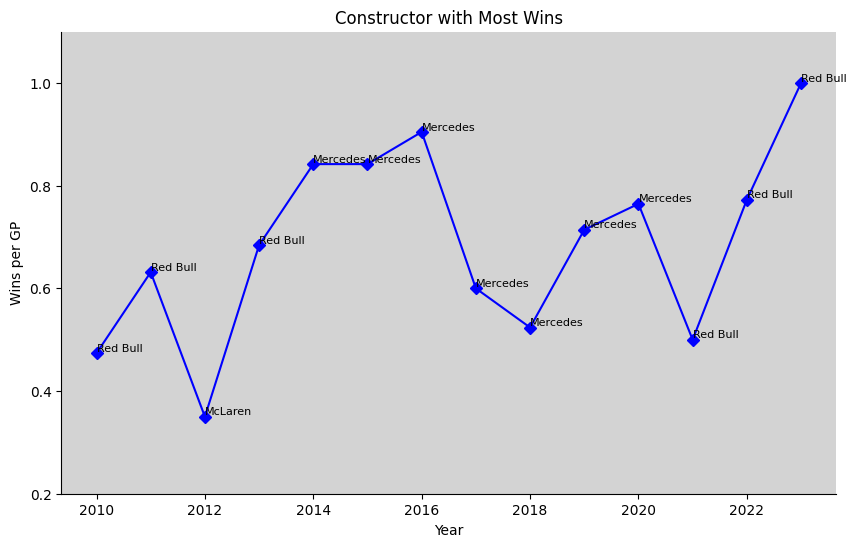

In [ ]:
grouped_wins = df30.groupby(['year', 'name_x']).agg({'positionOrder': lambda x: (x == 1).sum(), 'raceId': 'nunique'}).reset_index()

grouped_wins['average_win'] = grouped_wins['positionOrder'] / grouped_wins['raceId']

idx_max_average_win = grouped_wins.groupby('year')['average_win'].idxmax()

teams_with_highest_average_win = grouped_wins.loc[idx_max_average_win]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(teams_with_highest_average_win['year'], teams_with_highest_average_win['average_win'], marker='D', linestyle='-', color='blue')
plt.title('Constructor with Most Wins')
plt.xlabel('Year')
plt.ylabel('Wins per GP')

for i, row in teams_with_highest_average_win.iterrows():
    plt.text(row['year'], row['average_win'], f"{row['name_x']}", ha='left', va='bottom', fontsize=8, color='black')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#D3D3D3')

plt.ylim(0.2,1.1)
plt.show()

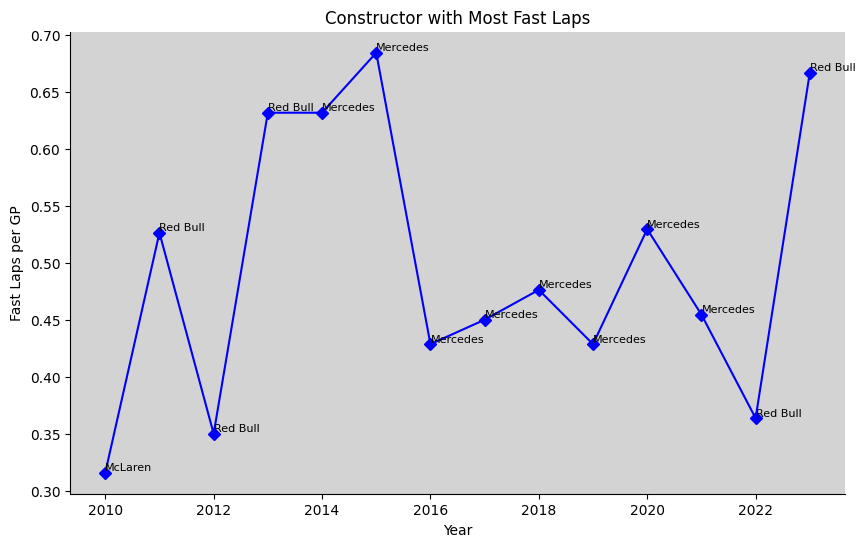

In [ ]:
grouped_fl = df30.groupby(['year', 'name_x']).agg({'rank': lambda x: (x == 1).sum(), 'raceId': 'nunique'}).reset_index()

grouped_fl['average_fl'] = grouped_fl['rank'] / grouped_fl['raceId']

idx_max_average_fl = grouped_fl.groupby('year')['average_fl'].idxmax()

teams_with_highest_average_fl = grouped_fl.loc[idx_max_average_fl]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(teams_with_highest_average_fl['year'], teams_with_highest_average_fl['average_fl'], marker='D', linestyle='-', color='blue')
plt.title('Constructor with Most Fast Laps')
plt.xlabel('Year')
plt.ylabel('Fast Laps per GP')

for i, row in teams_with_highest_average_fl.iterrows():
    plt.text(row['year'], row['average_fl'], f"{row['name_x']}", ha='left', va='bottom', fontsize=8, color='black')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#D3D3D3')

plt.ylim()
plt.show()